<a href="https://colab.research.google.com/github/TakuyaFujimura/AdjustSpeechPower/blob/main/AdjustSpeechPower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introduction**

[事前学習済み音声区間検出モデル](https://pytorch.org/hub/snakers4_silero-vad_vad/)により検出された各音声区間でのRoot Mean Square (RMS) が一定となるよう，音量を調整します．

非音声区間には処理を施しません．


**How to use**
1. Settingsを実行して下さい．
2. input_dataフォルダに処理対象の音声ファイルをアップロードして下さい．
 * アップロードするファイルの拡張子は**wav**でお願いします．
 * https://convertio.co/ja/wav-converter/ などでもwavに変換できます．
3. Processingを実行して下さい．処理結果はoutput_dataフォルダに保存されています．
 * outputフォルダに存在する.txtファイルには処理時の情報が保存されています．
 * 処理のために，入力信号のフォーマットを統一しています．フォーマット統一後の信号はconvertedフォルダに保存されています．
4. Visualizationを実行すると，処理結果を確認することができます．
 * figureフォルダに出力結果が保存されています．

**Note**
* 再起動したいとき：画面上部の"ランタイム"→"ランタイムを接続解除して削除"→"はい"

## **Settings**


**Parameter setting**：次のセルで，以下のパラメータを入力して下さい．
* `use_drive`：Google driveにデータを保存する場合は`True`，そうでない場合は`False`に設定して下さい．
 * 例1：`use_drive = True`
 * 例2：`use_drive = False`


In [1]:
use_drive = False

**Execution**：次のセルをそのまま実行して下さい．

In [2]:
from pathlib import Path
directory_name_list = ["input_data", "output_data", "converted_dir", "timestamp", "figure"]

if use_drive:
  from google.colab import drive
  drive.mount('/content/drive')
  %cd /content/drive/MyDrive
  
  for directory_name in directory_name_list:
    Path(f"./adjust_data/{directory_name}").mkdir(exist_ok=True, parents=True)
  %cd /content/drive/MyDrive/adjust_data
else:
  for directory_name in directory_name_list:
    Path(directory_name).mkdir(exist_ok=True)

!git clone https://github.com/TakuyaFujimura/AdjustSpeechPower.git
from AdjustSpeechPower import AdjustSpeechRMS
adjust_obj = AdjustSpeechRMS(*directory_name_list)

Cloning into 'AdjustSpeechPower'...
remote: Enumerating objects: 78, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 78 (delta 38), reused 50 (delta 19), pack-reused 0
Unpacking objects: 100% (78/78), 14.03 KiB | 435.00 KiB/s, done.


## **Processing**

**Parameter setting**：次のセルで，以下のパラメータを入力して下さい．
* `filepath_list`：処理対象のファイル名
 * ファイル名はダブルクォーテーションで囲い，複数ファイルを処理したい場合はカンマでつなげて下さい．
 * 例：`filepath_list = ["a.wav", "b.wav", "c.wav"]`




In [3]:
filename_list = ["Fvoice.wav", "Fvoice2.wav"]

**Execution**：次のセルをそのまま実行して下さい．

In [4]:
adjust_obj(filename_list)

Calculate a timestamp and save it as Fvoice.pkl


Downloading: "https://github.com/snakers4/silero-vad/zipball/master" to /root/.cache/torch/hub/master.zip


Calculate a timestamp and save it as Fvoice2.pkl


## **Visualization**

**Parameter setting**：次のセルで，以下のパラメータを入力して下さい．
* `filename`：処理結果を確認したいファイル名
 * ここで指定できるファイル名は1つのみです．
 * 例：`filename = "a.wav"`
* `start_sec`：表示する区間の始まり [秒]
 * 例：`start_sec = 0`
* `end_sec`：表示する区間の終わり [秒]
 * 例：`end_sec = 15`

In [5]:
filename = "Fvoice.wav"
start_sec = 0
end_sec = 15

**Execution**：次のセルをそのまま実行して下さい．

Use a saved timestamp: Fvoice.pkl


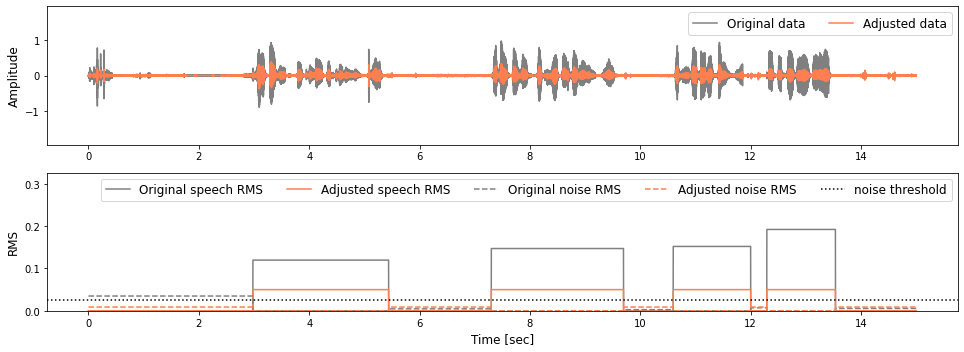

In [6]:
adjust_obj.plot_figs(filename, start_sec, end_sec)

## **Split and concat the wav file**

* wavファイルを分割・連結するためのプログラムです．
* 時間が長いファイルは分割→処理→連結とすることができます．

Split

**Parameter setting**：次のセルで，以下のパラメータを入力して下さい．
* `filename`：分割対象のファイル名
* `n_split`：分割数

* 処理結果はinput_dataフォルダに`filename_id.wav`の形式で保存されています．

In [7]:
filename = "Fvoice.wav"
n_split = 3

**Execution**：次のセルをそのまま実行して下さい．

In [8]:
from AdjustSpeechPower import wav_split
wav_split(f"input_data/{filename}", n_split)

Concatenate

**Parameter setting**：次のセルで，以下のパラメータを入力して下さい．
* `filename_list`：連結対象のファイル名のリスト
 * input_dataフォルダに存在するファイルの名前を入力します．
* `output_name`：連結したファイルを保存するときの名前


* 処理結果はinput_dataフォルダに`output_name`の名前で保存されます．

In [9]:
filename_list = ["Fvoice_0.wav", "Fvoice_1.wav", "Fvoice_2.wav"]
output_name = "Fvoice_concat.wav"

In [11]:
from AdjustSpeechPower import wav_concat
wav_concat([f"output_data/{i}" for i in filename_list], f"output_data/{output_name}")